In [1]:
import pandas as pd
import numpy as np
# from glob import glob
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, style='whitegrid', palette='Set2')
%matplotlib inline

In [5]:
# interserotype = { n : pd.read_csv('./southeast_asia/genotype/N%d/southeast_asia_genotype_interserotype_effects_N%d_model_performance.csv'%(n, n), index_col=0)
#                 for n in [1,2,3,5]}
all_effects = { n : pd.read_csv('./southeast_asia/genotype/N%d/southeast_asia_genotype_all_effects_N%d_model_performance.csv'%(n, n), index_col=0)
                for n in [1,3,5]}

parameters = ['beta', 'gamma', 'sigma']
metrics = ['abs_error', 'pearson_r2', 'spearman_r', 'information_gain', 'accuracy']

In [6]:
# ### Compare antigenic resolutions

# for metric in metrics:
#     ax = sns.regplot(interserotype[2][metric], all_effects[2][metric], scatter_kws={'alpha': 0.3})
#     ax.set_title('%s of serotype predictions'%metric)
#     ax.set_xlabel('Interserotype antigenic resolution')
#     ax.set_ylabel('All effects antigenic resolution')
#     plt.tight_layout()
#     plt.show()
#     plt.clf()

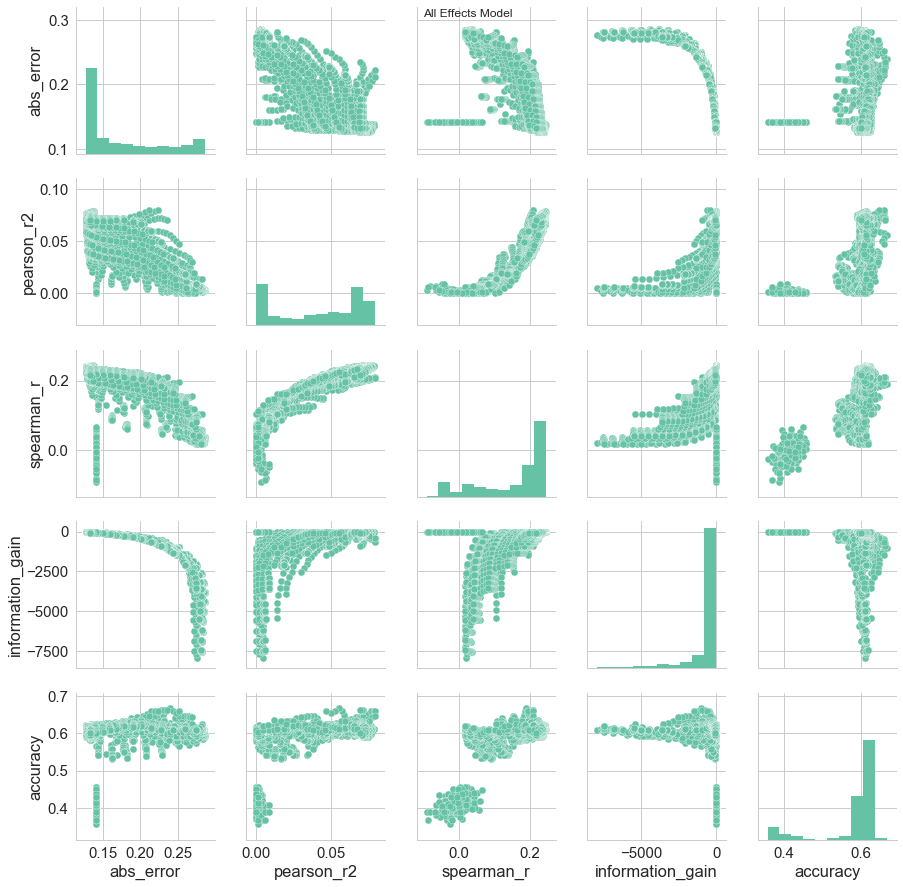

In [9]:
### compare metrics directly

# sns.pairplot(interserotype[2][metrics])
# plt.title('Interserotype Model')
# plt.show()
# plt.clf()

sns.pairplot(all_effects[3][metrics])
plt.suptitle('All Effects Model')
plt.show()
plt.clf()


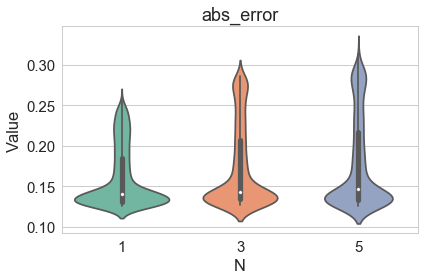

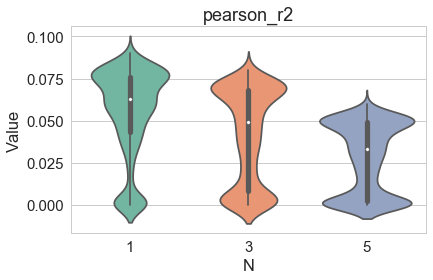

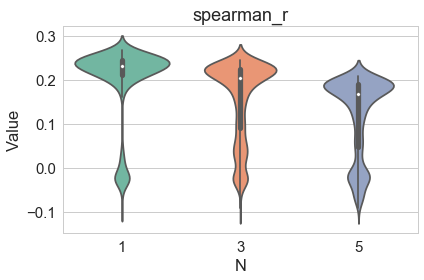

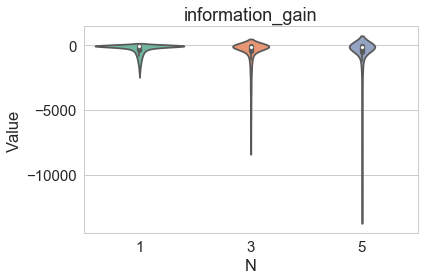

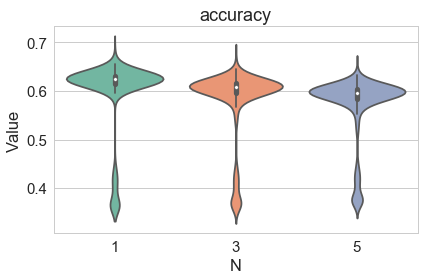

In [10]:
### Compare performance across values of N

for metric in metrics:
    data = pd.DataFrame({n:all_effects[n][metric] for n in [1,3,5]})
    data = data.melt(var_name='N', value_name='Value')
    ax = sns.violinplot(data['N'], data['Value'])
    ax.set_title(metric)
    plt.tight_layout()
    plt.show()
    plt.clf()

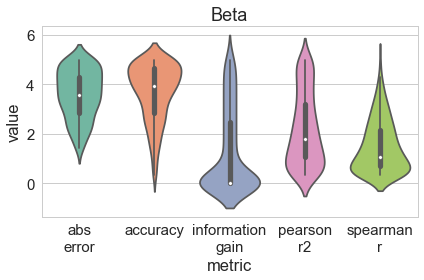

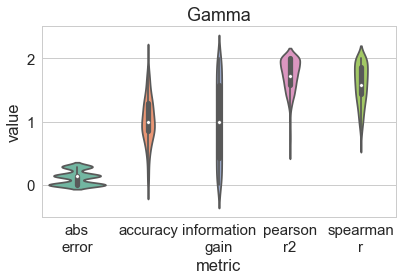

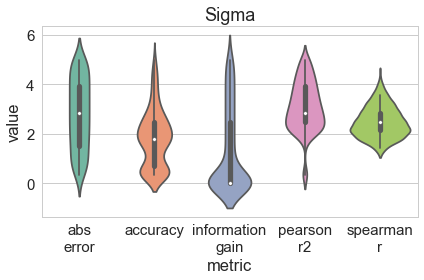

In [12]:
## Compare "best fit" across metrics

best_beta = {}
best_gamma = {}
best_sigma = {}

for metric in metrics:
    benchmark = np.percentile(all_effects[3][metric], 90)
    top_performance = all_effects[3].loc[all_effects[3][metric] >= benchmark]
    metric = metric.replace('_', '\n')
    best_beta[metric] = top_performance['beta']
    best_gamma[metric] = top_performance['gamma']
    best_sigma[metric] = top_performance['sigma']
    
best_beta = pd.DataFrame(best_beta).melt(var_name='metric', value_name='value')
beta_ax = sns.violinplot(x='metric', y='value', data=best_beta)
beta_ax.set_title('Beta')
plt.tight_layout()
plt.show()
plt.clf()

best_gamma = pd.DataFrame(best_gamma).melt(var_name='metric', value_name='value')
gamma_ax = sns.violinplot(x='metric', y='value', data=best_gamma)
gamma_ax.set_title('Gamma')
plt.tight_layout()
plt.show()
plt.clf()

best_sigma = pd.DataFrame(best_sigma).melt(var_name='metric', value_name='value')
sigma_ax = sns.violinplot(x='metric', y='value', data=best_sigma)
sigma_ax.set_title('Sigma')
plt.tight_layout()
plt.show()
plt.clf()